In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [2]:
# --------- Load flattened arrays ---------
features_folder = "./../features/training-a/flattened_arrays"

X_gray = np.load(f"{features_folder}/X_gray.npy")
y_gray = np.load(f"{features_folder}/y_gray.npy")

X_binary = np.load(f"{features_folder}/X_binary.npy")
y_binary = np.load(f"{features_folder}/y_binary.npy")

print("Grayscale shape:", X_gray.shape)
print("Binary shape:", X_binary.shape)

Grayscale shape: (19702, 64)
Binary shape: (19702, 64)


In [3]:
scaler = MinMaxScaler()
X_gray_scaled = scaler.fit_transform(X_gray)
X_binary_scaled = scaler.fit_transform(X_binary)

In [4]:
pca_gray = PCA(n_components=0.95, random_state=42)
X_gray_pca = pca_gray.fit_transform(X_gray_scaled)
cumulative_variance_gray = np.cumsum(pca_gray.explained_variance_ratio_)

pca_binary = PCA(n_components=0.95, random_state=42)
X_binary_pca = pca_binary.fit_transform(X_binary_scaled)
cumulative_variance_binary = np.cumsum(pca_binary.explained_variance_ratio_)

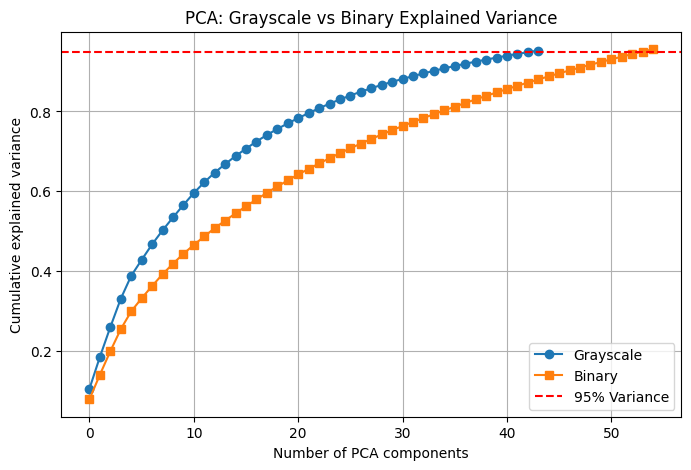

Grayscale PCA shape: (19702, 44)
Binary PCA shape: (19702, 55)
Total variance captured by grayscale: 0.9524715
Total variance captured by binary: 0.955884


In [5]:
# --------- Plot cumulative explained variance ---------
plt.figure(figsize=(8,5))
plt.plot(cumulative_variance_gray, marker='o', label='Grayscale')
plt.plot(cumulative_variance_binary, marker='s', label='Binary')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.xlabel("Number of PCA components")
plt.ylabel("Cumulative explained variance")
plt.title("PCA: Grayscale vs Binary Explained Variance")
plt.grid(True)
plt.legend()
plt.show()

# --------- Print info ---------
print("Grayscale PCA shape:", X_gray_pca.shape)
print("Binary PCA shape:", X_binary_pca.shape)
print("Total variance captured by grayscale:", cumulative_variance_gray[-1])
print("Total variance captured by binary:", cumulative_variance_binary[-1])

In [24]:
X_train_gray, X_test_gray, y_train_gray, y_test_gray = train_test_split(
    X_gray_pca, y_gray, test_size=0.2, random_state=42, stratify=y_gray
)

X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(
    X_binary_pca, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)

In [25]:
X_train_gray_t = torch.tensor(X_train_gray, dtype=torch.float32)
y_train_gray_t = torch.tensor(y_train_gray, dtype=torch.long)
X_test_gray_t = torch.tensor(X_test_gray, dtype=torch.float32)
y_test_gray_np = y_test_gray  # for sklearn metrics

X_train_binary_t = torch.tensor(X_train_binary, dtype=torch.float32)
y_train_binary_t = torch.tensor(y_train_binary, dtype=torch.long)
X_test_binary_t = torch.tensor(X_test_binary, dtype=torch.float32)
y_test_binary_np = y_test_binary

Training Grayscale Model


Epoch 1/20: 100%|███████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 609.03it/s]


Grayscale — Epoch 1/20 — Avg Loss: 0.7032


Epoch 2/20: 100%|██████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1080.17it/s]


Grayscale — Epoch 2/20 — Avg Loss: 0.6262


Epoch 3/20: 100%|██████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1179.65it/s]


Grayscale — Epoch 3/20 — Avg Loss: 0.6140


Epoch 4/20: 100%|██████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1112.60it/s]


Grayscale — Epoch 4/20 — Avg Loss: 0.6064


Epoch 5/20: 100%|██████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1160.88it/s]


Grayscale — Epoch 5/20 — Avg Loss: 0.6015


Epoch 6/20: 100%|██████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1158.47it/s]


Grayscale — Epoch 6/20 — Avg Loss: 0.5969


Epoch 7/20: 100%|██████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1164.23it/s]


Grayscale — Epoch 7/20 — Avg Loss: 0.5932


Epoch 8/20: 100%|██████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1135.49it/s]


Grayscale — Epoch 8/20 — Avg Loss: 0.5904


Epoch 9/20: 100%|██████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1049.07it/s]


Grayscale — Epoch 9/20 — Avg Loss: 0.5875


Epoch 10/20: 100%|█████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1098.83it/s]


Grayscale — Epoch 10/20 — Avg Loss: 0.5849


Epoch 11/20: 100%|█████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1119.30it/s]


Grayscale — Epoch 11/20 — Avg Loss: 0.5831


Epoch 12/20: 100%|█████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1109.19it/s]


Grayscale — Epoch 12/20 — Avg Loss: 0.5813


Epoch 13/20: 100%|██████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 992.67it/s]


Grayscale — Epoch 13/20 — Avg Loss: 0.5794


Epoch 14/20: 100%|█████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1077.56it/s]


Grayscale — Epoch 14/20 — Avg Loss: 0.5782


Epoch 15/20: 100%|█████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1061.28it/s]


Grayscale — Epoch 15/20 — Avg Loss: 0.5765


Epoch 16/20: 100%|█████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1127.00it/s]


Grayscale — Epoch 16/20 — Avg Loss: 0.5749


Epoch 17/20: 100%|█████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1137.43it/s]


Grayscale — Epoch 17/20 — Avg Loss: 0.5735


Epoch 18/20: 100%|█████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1130.63it/s]


Grayscale — Epoch 18/20 — Avg Loss: 0.5723


Epoch 19/20: 100%|█████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1107.66it/s]


Grayscale — Epoch 19/20 — Avg Loss: 0.5715


Epoch 20/20: 100%|█████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1174.94it/s]


Grayscale — Epoch 20/20 — Avg Loss: 0.5707


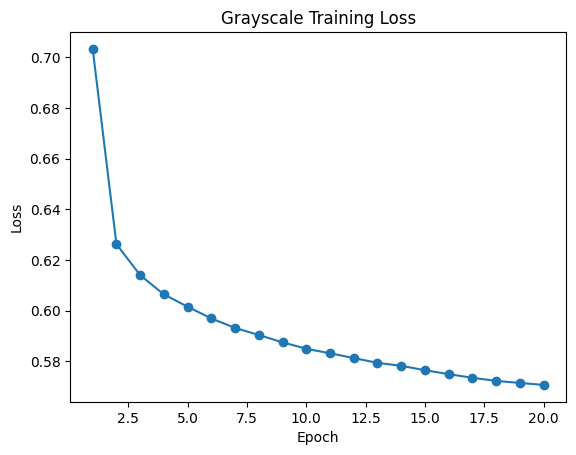

Grayscale accuracy: 78.36%


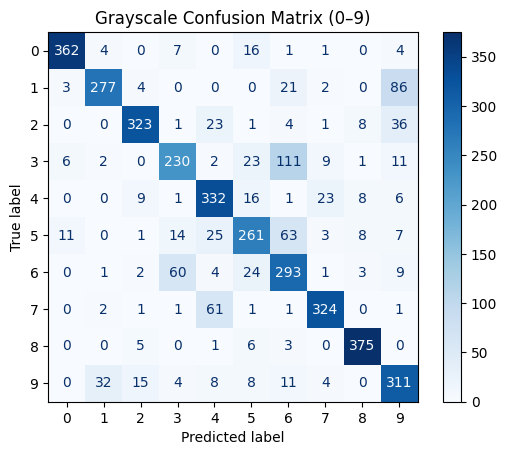

Training Binary Model


Epoch 1/20: 100%|██████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1100.45it/s]


Binary — Epoch 1/20 — Avg Loss: 0.9652


Epoch 2/20: 100%|██████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1062.02it/s]


Binary — Epoch 2/20 — Avg Loss: 0.9081


Epoch 3/20: 100%|██████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1148.57it/s]


Binary — Epoch 3/20 — Avg Loss: 0.8979


Epoch 4/20: 100%|██████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1095.70it/s]


Binary — Epoch 4/20 — Avg Loss: 0.8915


Epoch 5/20: 100%|██████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1086.00it/s]


Binary — Epoch 5/20 — Avg Loss: 0.8867


Epoch 6/20: 100%|██████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1141.99it/s]


Binary — Epoch 6/20 — Avg Loss: 0.8832


Epoch 7/20: 100%|██████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1061.27it/s]


Binary — Epoch 7/20 — Avg Loss: 0.8800


Epoch 8/20: 100%|██████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1099.26it/s]


Binary — Epoch 8/20 — Avg Loss: 0.8774


Epoch 9/20: 100%|███████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 911.63it/s]


Binary — Epoch 9/20 — Avg Loss: 0.8751


Epoch 10/20: 100%|█████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1106.69it/s]


Binary — Epoch 10/20 — Avg Loss: 0.8736


Epoch 11/20: 100%|█████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1099.01it/s]


Binary — Epoch 11/20 — Avg Loss: 0.8718


Epoch 12/20: 100%|█████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1158.89it/s]


Binary — Epoch 12/20 — Avg Loss: 0.8704


Epoch 13/20: 100%|█████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1134.80it/s]


Binary — Epoch 13/20 — Avg Loss: 0.8688


Epoch 14/20: 100%|█████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1132.19it/s]


Binary — Epoch 14/20 — Avg Loss: 0.8679


Epoch 15/20: 100%|█████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1091.94it/s]


Binary — Epoch 15/20 — Avg Loss: 0.8669


Epoch 16/20: 100%|█████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1089.51it/s]


Binary — Epoch 16/20 — Avg Loss: 0.8662


Epoch 17/20: 100%|█████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1082.31it/s]


Binary — Epoch 17/20 — Avg Loss: 0.8647


Epoch 18/20: 100%|█████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1094.36it/s]


Binary — Epoch 18/20 — Avg Loss: 0.8640


Epoch 19/20: 100%|█████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1110.00it/s]


Binary — Epoch 19/20 — Avg Loss: 0.8627


Epoch 20/20: 100%|█████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1106.07it/s]


Binary — Epoch 20/20 — Avg Loss: 0.8623


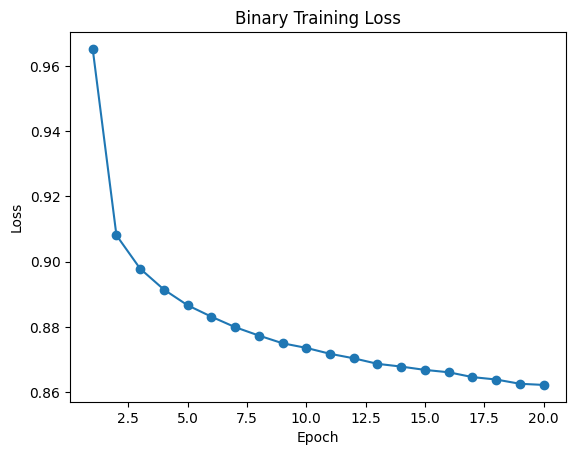

Binary accuracy: 66.96%


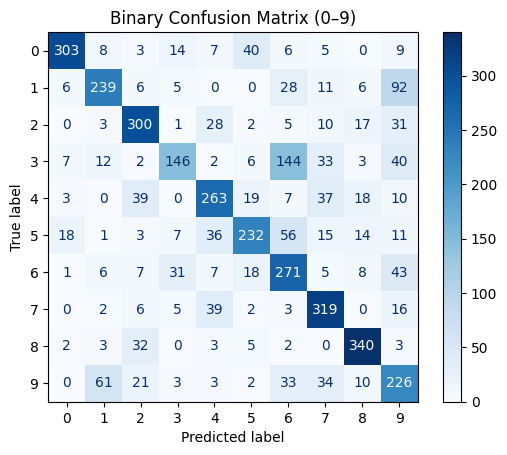

In [10]:
import os
import torch
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from tqdm import tqdm

# --- Hyperparameters ---
epochs = 20
batch_size = 32
lr = 0.01

# --- Checkpoint paths ---
checkpoint_gray = "checkpoint_gray.pth"
checkpoint_binary = "checkpoint_binary.pth"

# --- Simple MLP Definition ---
class SimpleMLP(nn.Module):
    def __init__(self, input_dim, hidden_dim=128, num_classes=10):
        super(SimpleMLP, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, num_classes)
        )
    def forward(self, x):
        return self.net(x)

# --- Initialize models ---
input_dim_gray = X_train_gray_t.shape[1]      # number of grayscale features
input_dim_binary = X_train_binary_t.shape[1]  # number of binary features

model_gray = SimpleMLP(input_dim=input_dim_gray, hidden_dim=128, num_classes=10)
model_binary = SimpleMLP(input_dim=input_dim_binary, hidden_dim=128, num_classes=10)

# --- Initialize losses & optimizers ---
losses_gray = []
losses_binary = []

loss_fn_gray = nn.CrossEntropyLoss()
optimizer_gray = optim.Adam(model_gray.parameters(), lr=lr)
num_samples_gray = X_train_gray_t.shape[0]
start_epoch_gray = 1

loss_fn_binary = nn.CrossEntropyLoss()
optimizer_binary = optim.Adam(model_binary.parameters(), lr=lr)
num_samples_binary = X_train_binary_t.shape[0]
start_epoch_binary = 1

# --- Load Grayscale checkpoint ---
if os.path.exists(checkpoint_gray):
    checkpoint = torch.load(checkpoint_gray)
    model_gray.load_state_dict(checkpoint['model_state'])
    optimizer_gray.load_state_dict(checkpoint['optimizer_state'])
    losses_gray = checkpoint['losses']
    start_epoch_gray = checkpoint['epoch'] + 1
    print(f"Resuming Grayscale training from epoch {start_epoch_gray}")

# --- Grayscale Training ---
print("Training Grayscale Model")
for ep in range(start_epoch_gray, epochs + 1):
    model_gray.train()
    epoch_loss = 0
    for i in tqdm(range(0, num_samples_gray, batch_size), desc=f"Epoch {ep}/{epochs}"):
        X_batch = X_train_gray_t[i:i + batch_size]
        y_batch = y_train_gray_t[i:i + batch_size]

        optimizer_gray.zero_grad()
        logits = model_gray(X_batch)
        loss = loss_fn_gray(logits, y_batch)
        loss.backward()
        optimizer_gray.step()
        epoch_loss += loss.item()

    avg_loss = epoch_loss / (num_samples_gray // batch_size)
    losses_gray.append(avg_loss)
    print(f"Grayscale — Epoch {ep}/{epochs} — Avg Loss: {avg_loss:.4f}")

    # Save checkpoint
    torch.save({
        'epoch': ep,
        'model_state': model_gray.state_dict(),
        'optimizer_state': optimizer_gray.state_dict(),
        'losses': losses_gray
    }, checkpoint_gray)

# --- Plot Grayscale Loss ---
plt.plot(range(1, len(losses_gray)+1), losses_gray, marker="o")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Grayscale Training Loss")
plt.show()

# --- Grayscale Evaluation ---
model_gray.eval()
with torch.no_grad():
    preds_gray = model_gray(X_test_gray_t).argmax(dim=1).numpy()

acc_gray = accuracy_score(y_test_gray_np, preds_gray)
print(f"Grayscale accuracy: {acc_gray*100:.2f}%")

cm_gray = confusion_matrix(y_test_gray_np, preds_gray)
disp_gray = ConfusionMatrixDisplay(cm_gray, display_labels=list(range(10)))
disp_gray.plot(cmap=plt.cm.Blues)
plt.title("Grayscale Confusion Matrix (0–9)")
plt.show()

# --- Load Binary checkpoint ---
if os.path.exists(checkpoint_binary):
    checkpoint = torch.load(checkpoint_binary)
    model_binary.load_state_dict(checkpoint['model_state'])
    optimizer_binary.load_state_dict(checkpoint['optimizer_state'])
    losses_binary = checkpoint['losses']
    start_epoch_binary = checkpoint['epoch'] + 1
    print(f"Resuming Binary training from epoch {start_epoch_binary}")

# --- Binary Training ---
print("Training Binary Model")
for ep in range(start_epoch_binary, epochs + 1):
    model_binary.train()
    epoch_loss = 0
    for i in tqdm(range(0, num_samples_binary, batch_size), desc=f"Epoch {ep}/{epochs}"):
        X_batch = X_train_binary_t[i:i + batch_size]
        y_batch = y_train_binary_t[i:i + batch_size]

        optimizer_binary.zero_grad()
        logits = model_binary(X_batch)
        loss = loss_fn_binary(logits, y_batch)
        loss.backward()
        optimizer_binary.step()
        epoch_loss += loss.item()

    avg_loss = epoch_loss / (num_samples_binary // batch_size)
    losses_binary.append(avg_loss)
    print(f"Binary — Epoch {ep}/{epochs} — Avg Loss: {avg_loss:.4f}")

    # Save checkpoint
    torch.save({
        'epoch': ep,
        'model_state': model_binary.state_dict(),
        'optimizer_state': optimizer_binary.state_dict(),
        'losses': losses_binary
    }, checkpoint_binary)

# --- Plot Binary Loss ---
plt.plot(range(1, len(losses_binary)+1), losses_binary, marker="o")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Binary Training Loss")
plt.show()

# --- Binary Evaluation ---
model_binary.eval()
with torch.no_grad():
    preds_binary = model_binary(X_test_binary_t).argmax(dim=1).numpy()

acc_binary = accuracy_score(y_test_binary_np, preds_binary)
print(f"Binary accuracy: {acc_binary*100:.2f}%")

cm_binary = confusion_matrix(y_test_binary_np, preds_binary)
disp_binary = ConfusionMatrixDisplay(cm_binary, display_labels=list(range(10)))
disp_binary.plot(cmap=plt.cm.Blues)
plt.title("Binary Confusion Matrix (0–9)")
plt.show()


Training Grayscale (44 features) Model


Epoch 1/20: 100%|███████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 883.76it/s]


Grayscale (44 features) — Epoch 1/20 — Avg Loss: 0.2764


Epoch 2/20: 100%|███████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 946.76it/s]


Grayscale (44 features) — Epoch 2/20 — Avg Loss: 0.1171


Epoch 3/20: 100%|██████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1106.69it/s]


Grayscale (44 features) — Epoch 3/20 — Avg Loss: 0.0798


Epoch 4/20: 100%|██████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1117.58it/s]


Grayscale (44 features) — Epoch 4/20 — Avg Loss: 0.0558


Epoch 5/20: 100%|██████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1142.80it/s]


Grayscale (44 features) — Epoch 5/20 — Avg Loss: 0.0408


Epoch 6/20: 100%|██████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1066.43it/s]


Grayscale (44 features) — Epoch 6/20 — Avg Loss: 0.0338


Epoch 7/20: 100%|███████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 837.65it/s]


Grayscale (44 features) — Epoch 7/20 — Avg Loss: 0.0335


Epoch 8/20: 100%|██████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1045.64it/s]


Grayscale (44 features) — Epoch 8/20 — Avg Loss: 0.0314


Epoch 9/20: 100%|██████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1094.37it/s]


Grayscale (44 features) — Epoch 9/20 — Avg Loss: 0.0255


Epoch 10/20: 100%|█████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1034.46it/s]


Grayscale (44 features) — Epoch 10/20 — Avg Loss: 0.0268


Epoch 11/20: 100%|█████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1101.73it/s]


Grayscale (44 features) — Epoch 11/20 — Avg Loss: 0.0199


Epoch 12/20: 100%|█████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1106.69it/s]


Grayscale (44 features) — Epoch 12/20 — Avg Loss: 0.0147


Epoch 13/20: 100%|█████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1089.23it/s]


Grayscale (44 features) — Epoch 13/20 — Avg Loss: 0.0208


Epoch 14/20: 100%|█████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1058.99it/s]


Grayscale (44 features) — Epoch 14/20 — Avg Loss: 0.0179


Epoch 15/20: 100%|█████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1047.70it/s]


Grayscale (44 features) — Epoch 15/20 — Avg Loss: 0.0155


Epoch 16/20: 100%|█████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1075.21it/s]


Grayscale (44 features) — Epoch 16/20 — Avg Loss: 0.0140


Epoch 17/20: 100%|█████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1079.94it/s]


Grayscale (44 features) — Epoch 17/20 — Avg Loss: 0.0212


Epoch 18/20: 100%|█████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1094.39it/s]


Grayscale (44 features) — Epoch 18/20 — Avg Loss: 0.0224


Epoch 19/20: 100%|█████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1036.64it/s]


Grayscale (44 features) — Epoch 19/20 — Avg Loss: 0.0142


Epoch 20/20: 100%|█████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1045.47it/s]


Grayscale (44 features) — Epoch 20/20 — Avg Loss: 0.0114


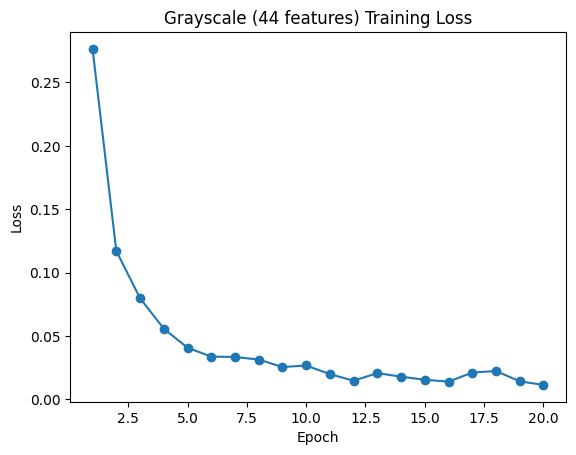

Grayscale (44 features) accuracy: 96.73%


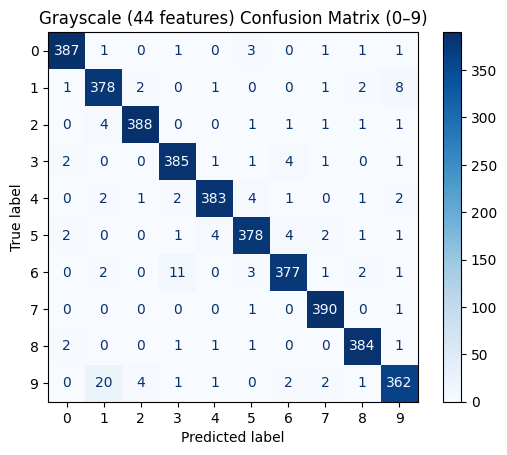

Training Binary (55 features) Model


Epoch 1/20: 100%|██████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1011.06it/s]


Binary (55 features) — Epoch 1/20 — Avg Loss: 0.5025


Epoch 2/20: 100%|██████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1043.11it/s]


Binary (55 features) — Epoch 2/20 — Avg Loss: 0.3115


Epoch 3/20: 100%|██████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1089.26it/s]


Binary (55 features) — Epoch 3/20 — Avg Loss: 0.2551


Epoch 4/20: 100%|██████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1026.30it/s]


Binary (55 features) — Epoch 4/20 — Avg Loss: 0.2162


Epoch 5/20: 100%|██████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1025.82it/s]


Binary (55 features) — Epoch 5/20 — Avg Loss: 0.1859


Epoch 6/20: 100%|██████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1056.71it/s]


Binary (55 features) — Epoch 6/20 — Avg Loss: 0.1609


Epoch 7/20: 100%|██████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1101.73it/s]


Binary (55 features) — Epoch 7/20 — Avg Loss: 0.1492


Epoch 8/20: 100%|██████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1019.44it/s]


Binary (55 features) — Epoch 8/20 — Avg Loss: 0.1321


Epoch 9/20: 100%|███████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 848.81it/s]


Binary (55 features) — Epoch 9/20 — Avg Loss: 0.1262


Epoch 10/20: 100%|█████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1067.75it/s]


Binary (55 features) — Epoch 10/20 — Avg Loss: 0.1132


Epoch 11/20: 100%|█████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1023.59it/s]


Binary (55 features) — Epoch 11/20 — Avg Loss: 0.1069


Epoch 12/20: 100%|█████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1052.73it/s]


Binary (55 features) — Epoch 12/20 — Avg Loss: 0.0890


Epoch 13/20: 100%|█████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1014.19it/s]


Binary (55 features) — Epoch 13/20 — Avg Loss: 0.1005


Epoch 14/20: 100%|█████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1065.85it/s]


Binary (55 features) — Epoch 14/20 — Avg Loss: 0.0920


Epoch 15/20: 100%|█████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1068.20it/s]


Binary (55 features) — Epoch 15/20 — Avg Loss: 0.0805


Epoch 16/20: 100%|█████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1100.38it/s]


Binary (55 features) — Epoch 16/20 — Avg Loss: 0.0792


Epoch 17/20: 100%|█████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1011.73it/s]


Binary (55 features) — Epoch 17/20 — Avg Loss: 0.0781


Epoch 18/20: 100%|█████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1058.99it/s]


Binary (55 features) — Epoch 18/20 — Avg Loss: 0.0692


Epoch 19/20: 100%|█████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1041.04it/s]


Binary (55 features) — Epoch 19/20 — Avg Loss: 0.0658


Epoch 20/20: 100%|█████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 1052.18it/s]


Binary (55 features) — Epoch 20/20 — Avg Loss: 0.0640


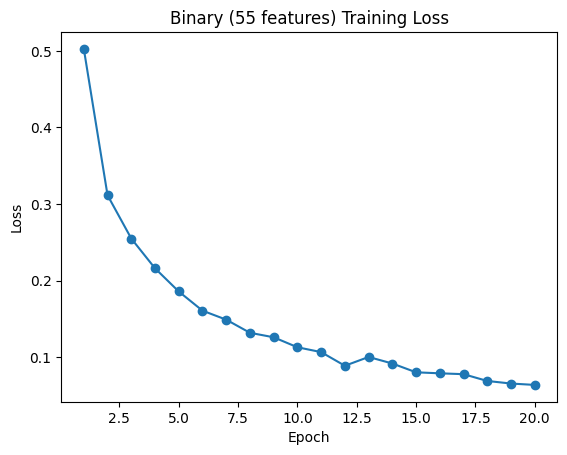

Binary (55 features) accuracy: 88.66%


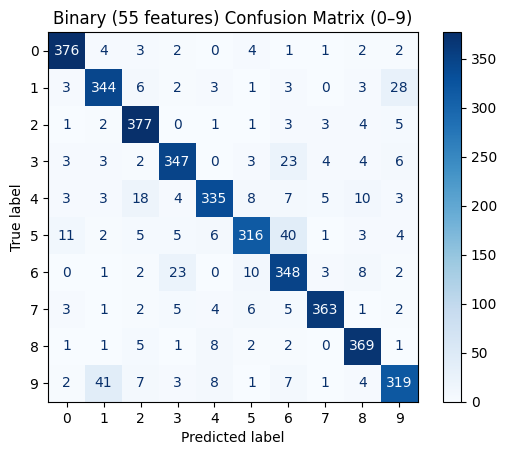

Saved final trained models: final_model_gray.pth, final_model_binary.pth


In [18]:
import os
import torch
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from tqdm import tqdm

# --- Hyperparameters ---
epochs = 20
batch_size = 32
lr = 0.01

# --- Checkpoint paths ---
checkpoint_gray = "checkpoint_gray.pth"
checkpoint_binary = "checkpoint_binary.pth"

# --- Simple MLP Definition ---
class SimpleMLP(nn.Module):
    def __init__(self, input_dim, hidden_dim=128, num_classes=10):
        super(SimpleMLP, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, num_classes)
        )
    def forward(self, x):
        return self.net(x)

# --- Initialize models with correct input dimensions ---
model_gray = SimpleMLP(input_dim=44)   # grayscale has 44 features
model_binary = SimpleMLP(input_dim=55) # binary has 55 features

# --- Training utility function ---
def train_model(model, X_train, y_train, X_test, y_test, checkpoint_path, title):
    losses = []
    loss_fn = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    num_samples = X_train.shape[0]
    start_epoch = 1

    # Load checkpoint if exists
    if os.path.exists(checkpoint_path):
        checkpoint = torch.load(checkpoint_path)
        model.load_state_dict(checkpoint['model_state'])
        optimizer.load_state_dict(checkpoint['optimizer_state'])
        losses = checkpoint['losses']
        start_epoch = checkpoint['epoch'] + 1
        print(f"Resuming {title} training from epoch {start_epoch}")

    # --- Training loop ---
    print(f"Training {title} Model")
    for ep in range(start_epoch, epochs + 1):
        model.train()
        epoch_loss = 0
        for i in tqdm(range(0, num_samples, batch_size), desc=f"Epoch {ep}/{epochs}"):
            X_batch = X_train[i:i + batch_size]
            y_batch = y_train[i:i + batch_size]

            optimizer.zero_grad()
            logits = model(X_batch)
            loss = loss_fn(logits, y_batch)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_loss = epoch_loss / (num_samples // batch_size)
        losses.append(avg_loss)
        print(f"{title} — Epoch {ep}/{epochs} — Avg Loss: {avg_loss:.4f}")

        # Save checkpoint
        torch.save({
            'epoch': ep,
            'model_state': model.state_dict(),
            'optimizer_state': optimizer.state_dict(),
            'losses': losses
        }, checkpoint_path)

    # --- Plot Loss ---
    plt.plot(range(1, len(losses)+1), losses, marker="o")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(f"{title} Training Loss")
    plt.show()

    # --- Evaluation ---
    model.eval()
    with torch.no_grad():
        preds = model(X_test).argmax(dim=1).numpy()

    acc = accuracy_score(y_test, preds)
    print(f"{title} accuracy: {acc*100:.2f}%")

    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(cm, display_labels=list(range(10)))
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"{title} Confusion Matrix (0–9)")
    plt.show()

# --- Train Grayscale and Binary models ---
train_model(model_gray, X_train_gray_t, y_train_gray_t, X_test_gray_t, y_test_gray_np, checkpoint_gray, "Grayscale (44 features)")
train_model(model_binary, X_train_binary_t, y_train_binary_t, X_test_binary_t, y_test_binary_np, checkpoint_binary, "Binary (55 features)")

# --- Optional: Save final trained models ---
torch.save(model_gray.state_dict(), "final_model_gray.pth")
torch.save(model_binary.state_dict(), "final_model_binary.pth")
print("Saved final trained models: final_model_gray.pth, final_model_binary.pth")
